
# Recomendación de Productos y Experiencia de Compra 🛍️

En esta lección, exploraremos cómo los sistemas de recomendación de productos pueden mejorar significativamente la experiencia de compra del cliente en el comercio electrónico. Aplicaremos técnicas prácticas utilizando datos reales de Kaggle.

## 🎯 Objetivos de Aprendizaje:
1. Comprender los fundamentos de los sistemas de recomendación.
2. Explorar diferentes tipos de sistemas de recomendación.
3. Implementar un sistema de recomendación básico con datos reales.
4. Analizar el impacto de las recomendaciones en la experiencia de compra utilizando análisis de datos.



## 🔑 Fundamentos de los Sistemas de Recomendación

Los sistemas de recomendación son algoritmos inteligentes diseñados para sugerir productos, servicios o contenidos relevantes a los usuarios, basándose en sus preferencias, comportamiento y patrones de consumo. Su objetivo principal es personalizar la experiencia del usuario y facilitar la toma de decisiones al ofrecer opciones alineadas con sus intereses.

**Ejemplos:** 🎬📱

- Un ejemplo muy conocido es el de Netflix: cuando un usuario ve una película o serie, la plataforma le sugiere automáticamente títulos similares. Esto no solo mejora la experiencia del usuario al mantenerlo entretenido, sino que también aumenta su permanencia en la plataforma. Esa conexión constante y personalizada genera un mayor compromiso (engagement), lo cual reduce la probabilidad de cancelación del servicio y asegura que el usuario continúe pagando mes a mes.

- Otro caso cotidiano es el de las redes sociales como Instagram, TikTok o YouTube. Estos sistemas analizan lo que nos gusta, lo que comentamos, lo que compartimos y lo que vemos durante más tiempo. Con esa información, nos muestran contenido personalizado que nos resulta atractivo. Así, pasamos más tiempo conectados, interactuamos más y nos volvemos usuarios recurrentes.

En el comercio electrónico, los sistemas de recomendación funcionan de manera similar: si un cliente compra o revisa un producto, el sistema le sugiere otros productos que podrían interesarle. Esto no solo mejora la experiencia del comprador, sino que también impulsa las ventas al fomentar compras adicionales, ventas cruzadas (cross-selling) y mayores ingresos por cliente.

#### En el contexto del e-commerce, estos sistemas se basan en:

1. **Datos del Usuario** 👤: Historial de compras, búsquedas, calificaciones.
2. **Datos del Producto** 📦: Características, categorías, popularidad.
3. **Datos Contextuales** 🌍: Temporada, ubicación, dispositivo.
 
#### Estos sistemas pueden mejorar significativamente la experiencia de compra al:
- Ayudar a los usuarios a descubrir productos relevantes.
- Reducir el tiempo de búsqueda.
- Aumentar la satisfacción del cliente.
- Incrementar las ventas cruzadas y el valor del carrito promedio.



## Tipos de Sistemas de Recomendación

1. 🤝 **Filtrado Colaborativo**: Recomienda productos basándose en las preferencias de usuarios similares.
2. 📑 **Basado en Contenido**: Recomienda productos similares a los que el usuario ha mostrado interés.
3. 🔄 **Híbrido**: Combina múltiples enfoques para obtener mejores resultados.

A continuación, implementaremos un sistema básico de filtrado colaborativo utilizando datos reales de Kaggle.


## 📥 Carga y Preparación de los Datos
Primero, cargamos el conjunto de datos que contiene reseñas de productos de Amazon y filtramos solo la información relevante para nuestro sistema de recomendación.

In [2]:

import pandas as pd

# Cargar el conjunto de datos de Kaggle
# Nota: Asegúrate de haber descargado el archivo 'Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv' del siguiente enlace:
# https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

# Mostrar las primeras filas del dataset
df.head()


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


##  Limpieza y Selección de Columnas🧹

In [3]:

# Filtrar las columnas relevantes
df_filtered = df[['reviews.username', 'reviews.rating', 'reviews.text', 'reviews.title', 'reviews.date', 'name']]

# Renombrar las columnas para mayor claridad
df_filtered.columns = ['username', 'rating', 'review_text', 'review_title', 'review_date', 'product_name']

# Mostrar las primeras filas del dataset filtrado
df_filtered.head()


,username,rating,review_text,review_title,review_date,product_name
0,Byger yang,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,2017-03-02T00:00:00.000Z,AmazonBasics AAA Performance Alkaline Batterie...
1,ByMG,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,2016-08-31T00:00:00.000Z,AmazonBasics AAA Performance Alkaline Batterie...
2,BySharon Lambert,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,2016-12-06T00:00:00.000Z,AmazonBasics AAA Performance Alkaline Batterie...
3,Bymark sexson,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,2016-03-28T00:00:00.000Z,AmazonBasics AAA Performance Alkaline Batterie...
4,Bylinda,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,2017-04-22T00:00:00.000Z,AmazonBasics AAA Performance Alkaline Batterie...


## Implementación de un Sistema de Recomendación Basado en Contenido

In [11]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Rellenar los valores NaN en 'review_text' con cadenas vacías
df_filtered['review_text'] = df_filtered['review_text'].fillna('')

# Crear una matriz TF-IDF de las descripciones de los productos
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_filtered['review_text'])

# Calcular la similitud del coseno entre las descripciones de los productos
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Construir un mapeo de los nombres de los productos a los índices del dataframe
indices = pd.Series(df_filtered.index, index=df_filtered['product_name']).drop_duplicates()

# Función para obtener recomendaciones de productos
def get_recommendations(product_name, cosine_sim=cosine_sim):
    # Obtener el índice del producto que coincide con el nombre
    idx = indices[product_name]

    # Obtener las puntuaciones de similitud de coseno de todos los productos con ese producto
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Ordenar los productos en función de las puntuaciones de similitud
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Obtener los índices de los 5 productos más similares
    sim_scores = sim_scores[1:6]
    product_indices = [i[0] for i in sim_scores]

    # Devolver los nombres de los 5 productos más similares
    return df_filtered['product_name'].iloc[product_indices]

# Ejemplo de uso de la función de recomendación
get_recommendations('Amazon Echo Show - Black')


C:\Users\pmora\AppData\Local\Temp\ipykernel_23124\62494312.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['review_text'] = df_filtered['review_text'].fillna('')


12262    Amazon Tap Smart Assistant Alexaenabled (black...
16640    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...
27729    Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...
16346    Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...
23787    Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...
Name: product_name, dtype: object


## Explicación del código:

Luego de importat librerías y limpiar los datos...

### Paso 1️⃣:

TF-IDF (Term Frequency – Inverse Document Frequency) transforma cada reseña escrita en una lista de números que representa qué tan importantes son las palabras dentro del conjunto de todas las reseñas.

📦 Por ejemplo, si muchos productos tienen la palabra “good”, esa palabra pierde valor (porque es común). Pero si un producto tiene la palabra “waterproof” y no muchos otros la tienen, esa sí tiene un peso especial.

⚙️ Así logramos que cada producto esté representado por un vector (una fila de números) que describe su contenido textual de forma matemática.

### Paso 2️⃣:

**📏 ¿Por qué usamos la similitud de coseno?**

Porque queremos medir qué tan parecidos son los vectores que representan cada producto. La similitud del coseno nos dice el ángulo entre dos vectores:

Si es cercano a 1 → muy similares 🟢

Si es cercano a 0 → muy diferentes 🔴

Así, si dos productos tienen reseñas que mencionan palabras similares, tendrán vectores que apuntan en la misma dirección.

### Paso 3️⃣: 

Buscar un producto por su nombre y saber en qué fila del DataFrame está. Es como tener un mapa 🗺️ para ubicar el producto en la tabla.

### Resultados del algoritmo:

- Busca el producto que el usuario ingresó.

- Calcula qué tan similares son los demás productos a ese.

- Ordena los más parecidos (excepto el mismo).

- Devuelve los 5 productos más similares.

Según las reseñas de texto, los 5 productos más similares a **Amazon Echo Show - Black** (productos que seleccionamos) son:

- Amazon Tap Smart Assistant

- All-New Fire HD 8 Tablet

- Fire HD 8 Tablet with Alexa

- Fire Kids Edition Tablet (dos versiones similares)"

Esto sugiere que los usuarios usaron palabras parecidas o expresaron opiniones similares en sus reseñas, por eso el modelo los relacionó como productos cercanos.

Se puede ahora utilizar la función get_recommendations ingresando el nombre de cualquier producto para obtener la recomendación de 5 productos con características similares que serán de preferencia para el usuario que realiza la búsqueda.


## Impacto de las Recomendaciones en la Experiencia de Compra 🛒

Los sistemas de recomendación pueden mejorar significativamente la experiencia de compra:

1. **Personalización**: Ofrecen una experiencia adaptada a cada usuario.
2. **Descubrimiento de Productos**: Ayudan a los usuarios a encontrar productos que de otra manera podrían pasar por alto.
3. **Ahorro de Tiempo**: Reducen el tiempo de búsqueda del usuario.
4. **Aumento de Ventas**: Incrementan las ventas cruzadas y el valor del carrito promedio.

Vamos a analizar el impacto de las recomendaciones en las ventas utilizando visualizaciones.


## 📈 Visualización del Impacto de las Recomendaciones
A continuación, creamos un gráfico comparativo con datos hipotéticos que muestra cómo evolucionan las ventas con y sin un sistema de recomendaciones a lo largo de 6 meses:

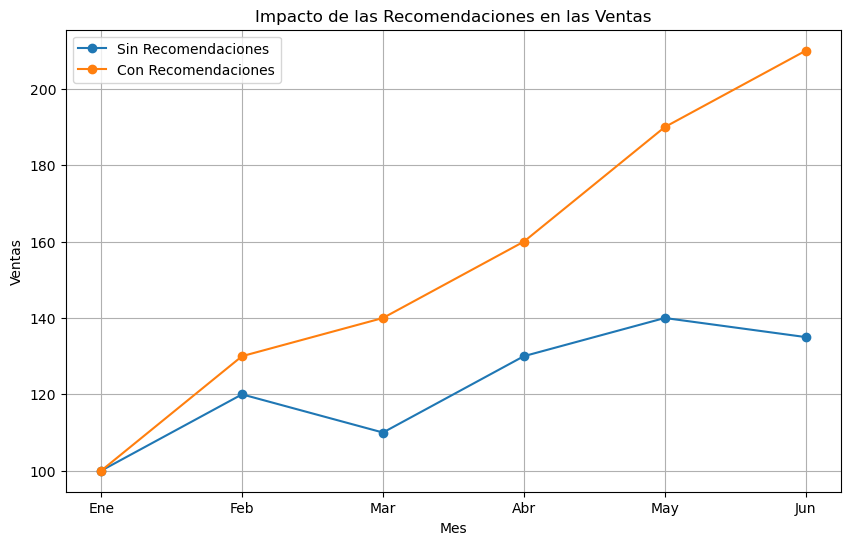

In [5]:

import matplotlib.pyplot as plt

# Datos hipotéticos de ventas con y sin recomendaciones
ventas_sin_recomendaciones = [100, 120, 110, 130, 140, 135]
ventas_con_recomendaciones = [100, 130, 140, 160, 190, 210]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun']

plt.figure(figsize=(10, 6))
plt.plot(meses, ventas_sin_recomendaciones, label='Sin Recomendaciones', marker='o')
plt.plot(meses, ventas_con_recomendaciones, label='Con Recomendaciones', marker='o')
plt.title('Impacto de las Recomendaciones en las Ventas')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()


### ¿Qué nos dice este gráfico?
- 📉 Línea azul (Sin Recomendaciones): Muestra un crecimiento más lento y menos estable.
- 📈 Línea naranja (Con Recomendaciones): Refleja un aumento sostenido en las ventas a lo largo del tiempo.


## Conclusiones

Los sistemas de recomendación son una herramienta fundamental en el marketing digital y el comercio electrónico. Implementar recomendaciones personalizadas puede mejorar significativamente la experiencia de compra, aumentar la satisfacción del cliente y generar mayores ventas.

**Resumen:**
- TF-IDF 📚: transforma texto en números relevantes.
- Cosine Similarity 📐: mide cuán similares son los productos.
- Recomendamos productos cuya descripción textual se parece más a la del producto elegido.

**Puntos Clave:** 💡
- Utilizamos datos reales para entender cómo funcionan los sistemas de recomendación.
- El filtrado colaborativo y otros enfoques pueden mejorar la personalización.
- El análisis de recomendaciones muestra su impacto en la experiencia de compra y ventas 💵 para los usuarios.

Este ejercicio demuestra cómo aplicar estos conceptos en un entorno real y ofrece una base para futuros desarrollos en proyectos de marketing.
